<a href="https://colab.research.google.com/github/DanOliveira-DS/data_science/blob/master/Projeto_Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Obtenção dos Dados

O conjunto de dados foi coletado e analisado durante uma colaboração de pesquisa da Worldline e do Machine Learning Group da ULB (Université Libre de Bruxelles [link](http://mlg.ulb.ac.be)) sobre mineração de big data e detecção de fraude. Mais detalhes sobre projetos atuais e passados sobre tópicos relacionados estão disponíveis neste [link](https://www.researchgate.net/project/Fraud-detection-5) e na página do projeto DefeatFraud

O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações. Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Nosso objetivo e implementar um modelo de aprendizado de máquina (Machine Learning) de classificação e avaliar o seu desempenho. 



# Checklist


1. Importando bibliotecas


2. Importando dataset


3. Analise Exploratoria dos Dados
    * Tamanho do conjunto de dados
    * Visualização do conjunto de dados (5 primeiras entradas)
    * Lidando valores ausentes
    * Informação sobre os atributos
    * Verificando os tipos de dados das colunas
    * Propriedades estatísticas do conjunto de dados
    * Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
    * Plotar os seguintes histogramas:
        * Variável `Time`
            * Fraude (`Class == 1`)
            * Normal (`Class == 0`)
        * Variável `Amount`
            * Fraude (`Class == 1`)
            * Normal (`Class == 0`)
    * Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
    * Plotar uma matriz de correlação
    

4. Preparação dos Dados
    * Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
    * Dividir o conjunto de dados entre treino e teste
    * Balanceamento o conjunto de dados
    

5. Modelo de Machine Learning
    * Construir um modelo para **classificação**.
    * [*Opcional*] Construir um modelo para árvore de decisão.
    * [*Opcional*] Construir um modelo para SVM.


6. Avaliar o desempenho do modelo
    * Identificar a melhor métrica para esse tipo de modelo
    * [*Opcional*] Comparar o desempenho entre diversos modelos


7. Conclusão

In [0]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

# mostra todas as colunas presentes no dataset
pd.set_option('display.max_columns', None)

# 2. Importando dataset

In [0]:
creditCard_df = pd.read_csv("C:\\Users\\danil\\Documents\\Data Science\\Datasets\\creditcard.csv")

# 3. Analise Exploratoria dos Dados

## Tamanho do conjunto de dados
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 284807 entradas e 31 atributos.

In [0]:
# Tamanho do conjunto de dados
print(f"TAMANHO DO CONJUNTO DE DADOS:")
print(f"- ENTRADAS: {creditCard_df.shape[0]}")
print(f"- ATRIBUTOS: {creditCard_df.shape[1]}")

TAMANHO DO CONJUNTO DE DADOS:
- ENTRADAS: 284807
- ATRIBUTOS: 31


## Visualização do conjunto de dados
Visualizar as 5 entradas desse conjunto de dados nos permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [0]:
# Ver as 5 primeiras entradas
creditCard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Lidando valores ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessario um tratamento nos dados antes de realizarmos nossas analises.

In [0]:
# Verificando a presença de valores ausentes
creditCard_df.isnull().sum().max()


0

percebesse que nao temos valores ausentes

## Informação sobre os atributos

* `Time` - contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.
* `Amount` - valor da transação
* `Class`-
     * 0 : Transação normal
     * 1 : Transação fraudulenta
     
As demais variáveis `V1`,`V2`.... `V28` foram descaracterizadas (por problemas ligados à privacidade e segurança) e passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações.


## Verificando os tipos de dados das colunas


In [0]:
creditCard_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Propriedades estatísticas do conjunto de dados
O comando creditCard.describe() nos ajuda a visualizar as propriedades estatísticas de variáveis numéricas. Exclui variáveis categoricas.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* count - quantidade de entradas válidas
* mean - média dos valores
* std - desvio padrão
* min - menor valor da coluna
* 25% - (Q1) primeiro quartil 25
* 50% - mediana
* 75% - (Q3) terceiro quartil 75
* max - maior valor da coluna

Com método .describe() é possível identificar colunas com valores ausentes e possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [0]:
creditCard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Pontos importantes a serem observados:
 * varivável `Time` confirma a 284807 transações no periodo de 2 dias ou 172792 segundos. As demais variáveis `V1, V2 .... V28` não apresentam valores discrepantes
 * Na variável `Amount` ja é possivel visualizar algumas irregularidades. Nota-se um valor médio de 88,34, mediana igual a 22 e um devio padrão de 250,12. Sendo seu valor máximo 25691.16, isso mostra que grande parte das transações financeiras são de quantias menores, algo ja esperado.
 * Já a variável `Class` como mencionamos acima so reforça a ideia dos dados desbalanceados
 
Vamos analisar mais de perto esse desbalanceamento

# Balanceamento do dataset

Valores totais de transações por classe:
0    284315
1       492
Name: Class, dtype: int64

As fraudes representam 0.173% do dataset


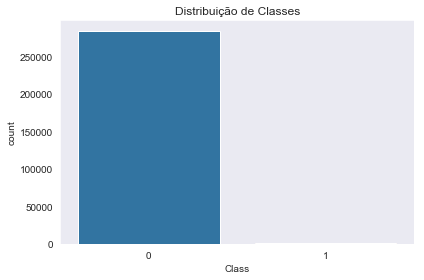

In [0]:
# Balanceamento de classes
print(f"Valores totais de transações por classe:")
print(creditCard_df.Class.value_counts())

print(f"\nAs fraudes representam {round((creditCard_df[creditCard_df.Class == 1].shape[0]/creditCard_df.shape[0]) * 100,3)}% do dataset")

# visualizacão do balanceamento dos dados
fig, ax = plt.subplots()

sns.countplot(x='Class', data=creditCard_df, ax=ax)
ax.set_title("Distribuição de Classes")
plt.tight_layout()

Nosso gráfico confirma o desbalancemanto entre nossas classes. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

## Histograma Variável `Time`

Um histograma é um gráfico de frequência que tem como objetivo ilustrar como uma determinada amostra ou população de dados está distribuída. Ele mede quantas vezes temos determinado valor dentro dessa nossa distribuição de dados. Nosso grafico tem como objetivo mostrar como nossa classe está distribuida em relaçao ao tempo (segundos) 

* Fraude (Class == 1)
* Normal (Class == 0)



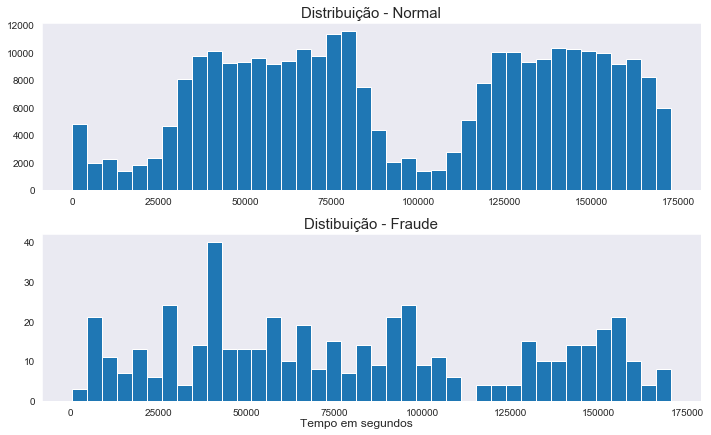

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

bins = 40
# Histograma para Class = 0
ax[0].hist(creditCard_df.Time[creditCard_df.Class == 0], bins=bins)
ax[0].set_title("Distribuição - Normal", fontsize = 15)

ax[1].hist(creditCard_df.Time[creditCard_df.Class == 1], bins=bins)
ax[1].set_title("Distibuição - Fraude", fontsize = 15)

fig.text(0.5, 0.004, "Tempo em segundos", fontsize=12, ha='center')

plt.tight_layout()

## Histograma Variável Amount

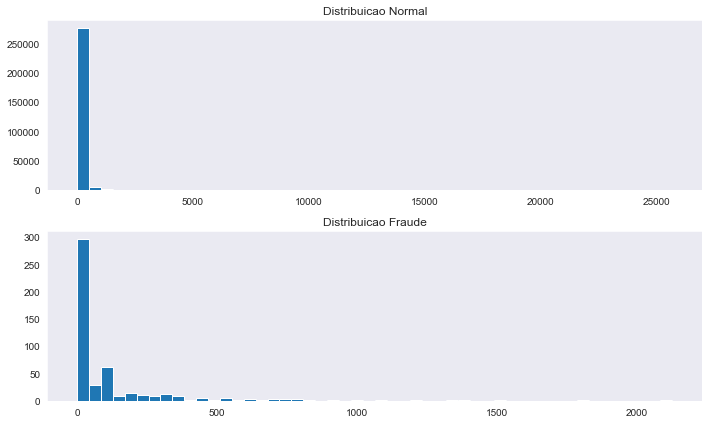

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
bins = 50
# distribuição varivel amount x class = 0
ax[0].hist(creditCard_df.Amount[creditCard_df.Class == 0], bins=bins)
ax[0].set_title("Distribuicao Normal")


# distribuição varivel amount x class = 1
ax[1].hist(creditCard_df.Amount[creditCard_df.Class == 1], bins=bins)
ax[1].set_title("Distribuicao Fraude")

plt.tight_layout()

# Detecção de Outlier
Os *outliers* assim como os valores ausentes inteferem nas qualidade da nossa analise. Eles são registros de dados que diferem dramaticamente de todos os outros, eles se distinguem em uma ou mais características. Em outras palavras, um outlier é um valor que escapa à normalidade e pode (e provavelmente causará) anomalias nos resultados obtidos.

Compreender os outliers é fundamental na análise de dados para pelo menos dois aspectos:

* Os *outliers* podem influenciar negativamente todo o resultado de uma análise;
* o comportamento dos *outliers* pode ser exatamente o que está sendo procurado.

Uma das melhores maneiras de identificar dados discrepantes alem do metodo `.describe()` que utilizamos acima é usar gráficos. Ao traçar um gráfico, podemos ver claramente que existe algo diferente.

## Gráfico boxplot
O gráfico boxplot tem uma estrutura que casa muito bem com o método `describe()` que vimos anteriormente. São uma maneira padronizada de exibir a distribuição de dados com base em um resumo de cinco números (“mínimo”, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e “máximo”).

<center><img width="30%" src="https://caetreinamentos.com.br/blog/wp-content/uploads/2019/01/grafico-box-plot.png"></center>

Vamos realizar o boxplot da nossa variavel alvo `Class` em relação a variavel `Amount`:

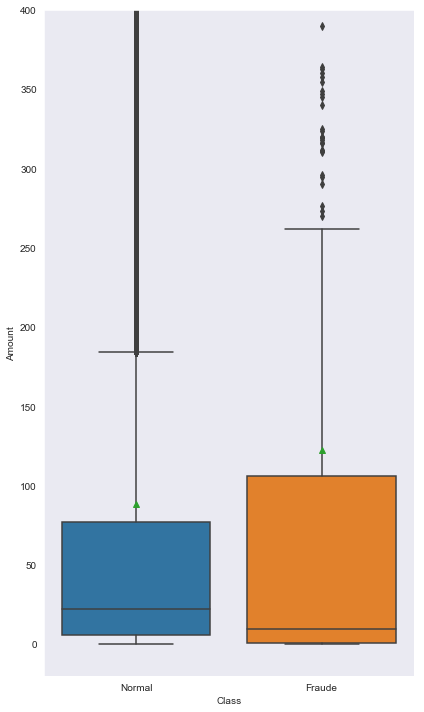

In [0]:
# box plot
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(creditCard_df.Class, creditCard_df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de machine learning.

In [0]:
# As informações estatísticas para df.Class == 1 
creditCard_df[(creditCard_df.Class == 1) & (creditCard_df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

mostram que a sua média exata está em 118.13 e a mediana em 9.21.

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.


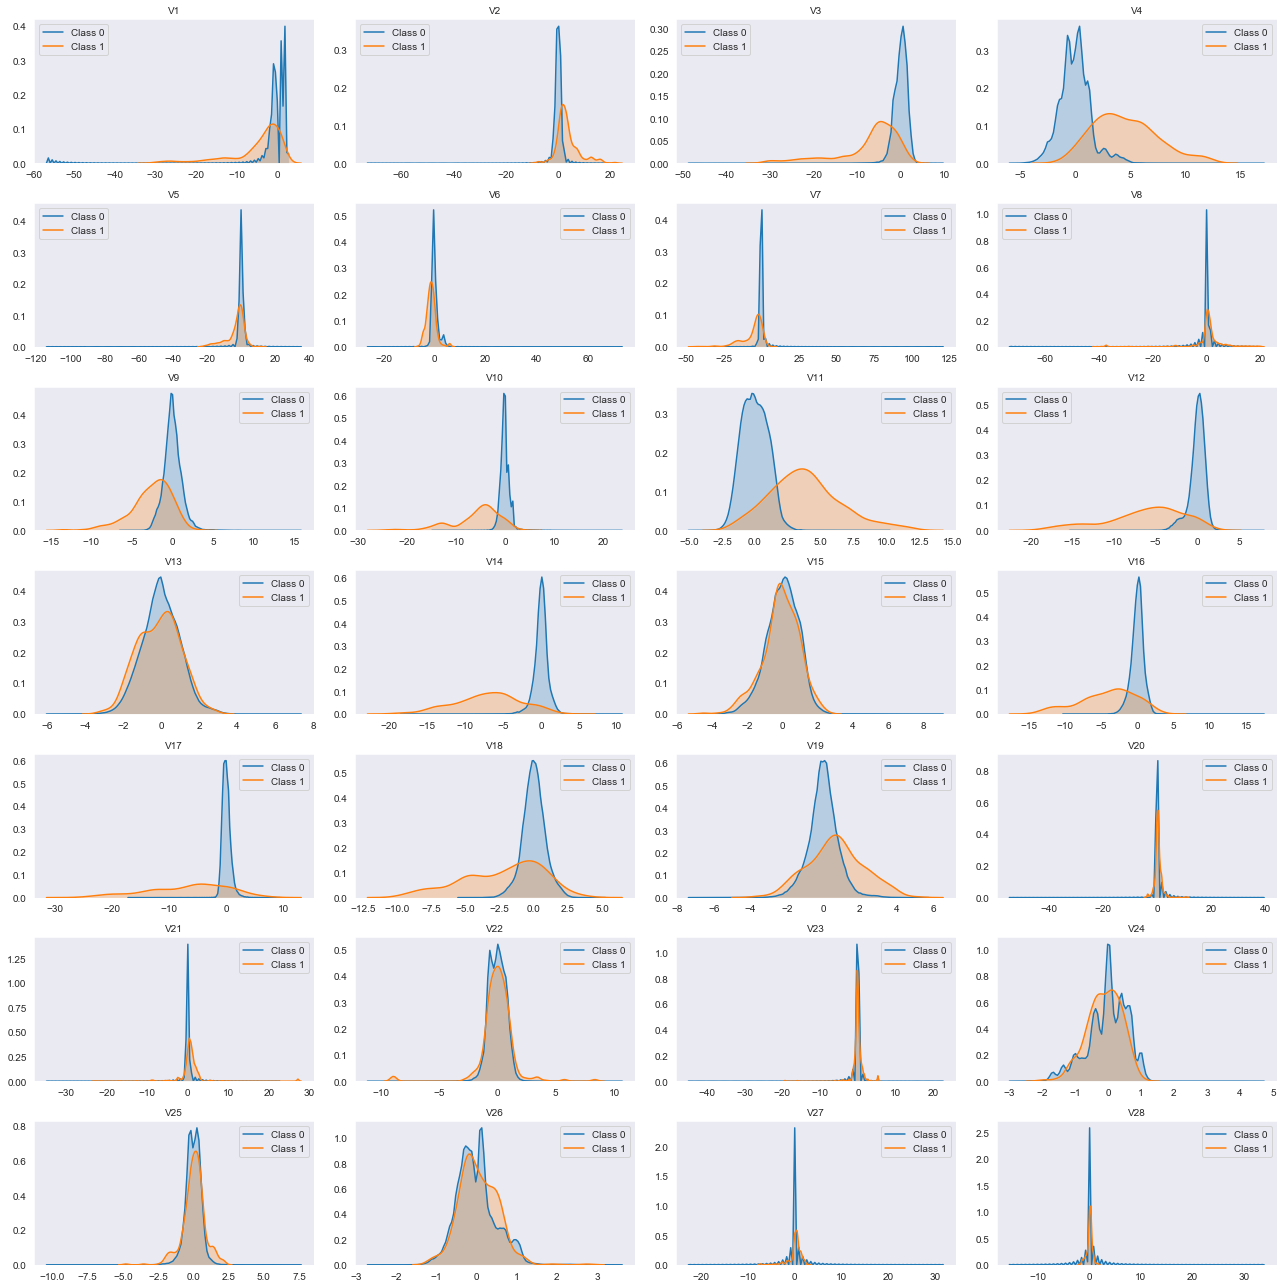

In [0]:
column_names = creditCard_df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
creditCard_df_class_0 = creditCard_df[creditCard_df.Class == 0]
creditCard_df_class_1 = creditCard_df[creditCard_df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(creditCard_df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(creditCard_df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Pontos importantes:
* Foi possivel analisar que em variaveis como V1, V2, V5... temos comportamento iguais
* Em outros casos como V3, V4 , V14 ja fica mais claro como são bem distintas 


# Mapa de calor
Um mapa de calor é uma representação gráfica em que valores individuais de uma matriz são representados como cores. Um mapa de calor é muito útil para visualizar a concentração de valores entre duas dimensões de uma matriz. Isso ajuda a encontrar padrões e fornece uma perspectiva de profundidade.

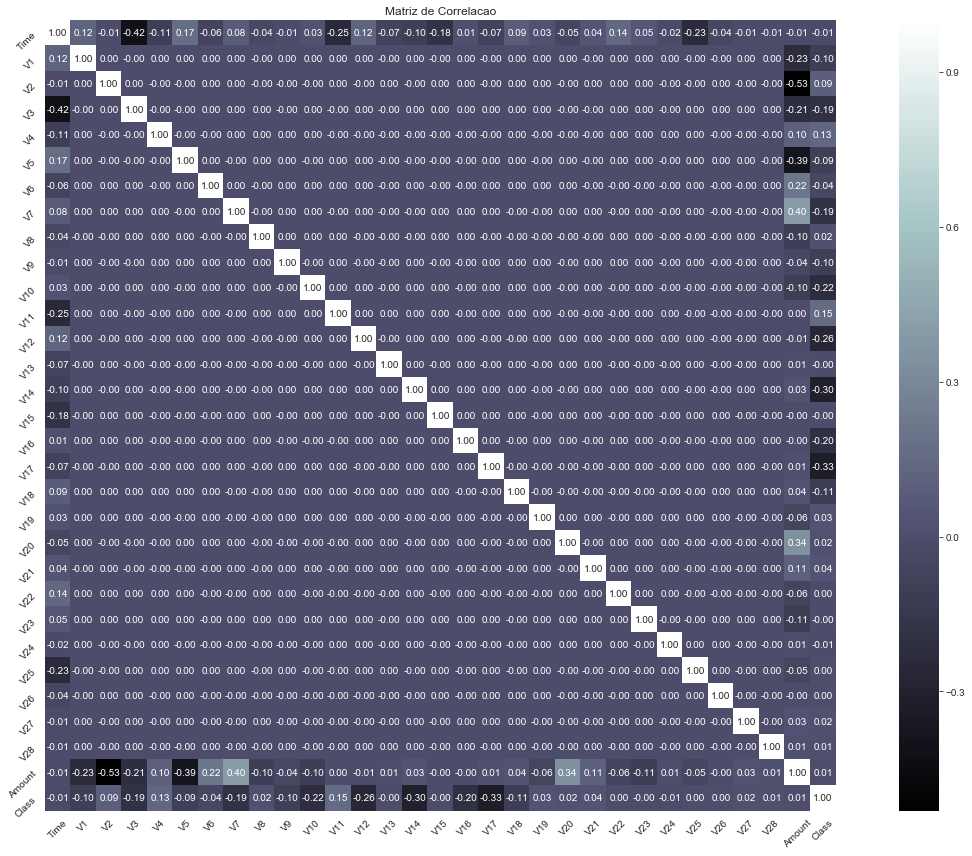

In [0]:
corr = creditCard_df.corr()

fig, ax = plt.subplots(figsize=(18,12))
ax.set_title('Matriz de Correlacao')
ax = sns.heatmap(corr, cmap='bone', square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)           
plt.tight_layout()



Principais observações que puderam ser extraídas dessa etapa exploratória foram:

* O dataset está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais. Nosso mapa de calor reforça essa ideia.
* Não existem valores ausentes ou nulos no dataframe.
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as features originais foram padronizadas.
* As colunas Time e Amount não estão normalizadas.

# 4. Preparação dos Dados


## Normalizar os dados que ainda não haviam sido pré-processados (Time e Amount)
Para esta etapa, uma vez que a coluna Amount possui outliers será usada a padronização por meio da classe StandardScaler.

In [0]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\programdata\anaconda3\lib\site-packages (0.6.1)


In [0]:
# vamos criar uma copia do nosso dataset
creditCard_df_clean = creditCard_df.copy()

# padronizar
std_scaler = StandardScaler()
creditCard_df_clean['std_amount'] = std_scaler.fit_transform(creditCard_df_clean['Amount'].values.reshape(-1,1))
creditCard_df_clean['std_time'] = std_scaler.fit_transform(creditCard_df_clean['Time'].values.reshape(-1,1))

creditCard_df_clean.drop(['Time','Amount'], axis=1, inplace=True)

# head()
creditCard_df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## Dividir entre conjuntos de treino e teste

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos stratify=True.

In [0]:
# separar variaveis entre X e y
X = creditCard_df_clean.drop('Class', axis=1)
y = creditCard_df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)


## Balanceamento dos dados

Usando a biblioteca imblearn é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar Under-sampling, preservando a classe minoritária.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste notebook).

1    369
0    369
Name: Class, dtype: int64


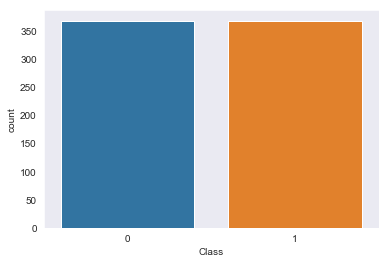

In [0]:
# tecnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuicao
sns.countplot(y_rus);

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

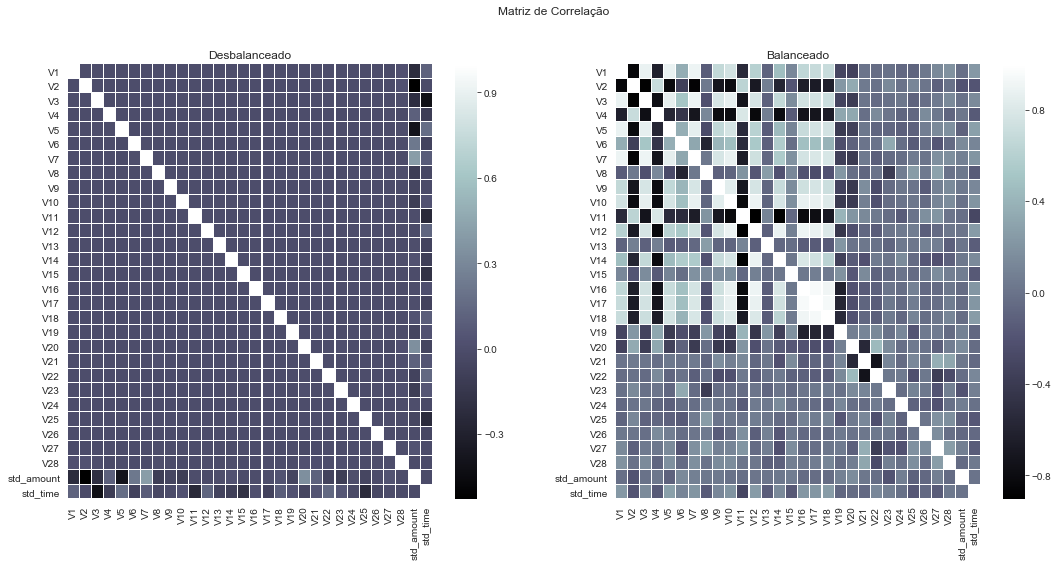

In [0]:
# Nova matriz de correlacao
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="bone", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="bone", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

# Modelo de Machine Learning
Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados X_rus e y_rus. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [0]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. Você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Uma outra métrica considerada interessante para se avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 95% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9727    0.9861     71079
           1     0.0559    0.9350    0.1054       123

    accuracy                         0.9726     71202
   macro avg     0.5279    0.9538    0.5457     71202
weighted avg     0.9983    0.9726    0.9846     71202

Acurácia: 0.9726

AUC: 0.9538



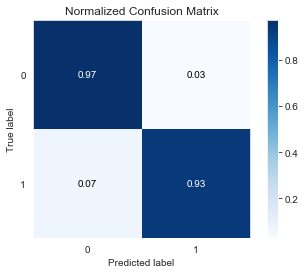

In [0]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))